<a href="https://colab.research.google.com/github/bjoyita/Regression_ML/blob/main/OrdReg_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASSIFICATION: Materials Property (Corrosion resistance)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [ ]:
data = pd.read_csv('SyntheticCorrData2.csv', encoding='latin')

In [ ]:
# Create a DataFrame
df = pd.DataFrame(data)

In [ ]:
df

,Metal/Alloy Name,Corrosion Rate (mpy),Corrosion Density Current (µA/cm²),Polarization Resistance (ohms),Media,Corrosion Resistance
0,"Composite 1 (Al-88%, Mg-29%)",0.295,9.44,2716.87,Sulfide Solution,Fair
1,"Composite 2 (Al-64%, Mg-43%)",0.192,9.45,1340.52,Alkaline Solution,Fair
2,"Metal 3 (Fe-77%, C-29%)",0.471,8.69,771.24,Acidic Solution,Poor
3,"Composite 4 (Al-70%, Mg-39%)",0.487,6.40,9405.91,Seawater,Poor
4,"Alloy 5 (Cu-78%, Zn-23%)",0.149,8.03,4172.22,Atmospheric,Excellent
...,...,...,...,...,...,...
145,"Composite 146 (Al-73%, Mg-33%)",0.467,4.59,4801.03,Alkaline Solution,Poor
146,"Metal 147 (Fe-93%, C-20%)",0.256,0.42,5846.15,Alkaline Solution,Fair
147,"Composite 148 (Al-60%, Mg-49%)",0.274,2.87,7370.86,Oil & Gas Environment,Fair
148,"Composite 149 (Al-57%, Mg-36%)",0.345,4.17,5581.85,Oil & Gas Environment,Poor


In [ ]:
X = df[['Corrosion Rate (mpy)', 'Corrosion Density Current (µA/cm²)', 'Polarization Resistance (ohms)']]
y = df['Corrosion Resistance']

The y_encoded variable is the result of applying .fit_transform() to the target variable y after reshaping it to a 2-dimensional array with one column using y.values.reshape(-1, 1) [This transformation changes the orientation of the array from horizontal to vertical]. Then .ravel() is called to flatten this 2-dimensional array into a 1-dimensional array. This flattened array is then used as the encoded target variable for training the machine learning model.

In [ ]:
# Ordinal encode the target variable
ordinal_encoder = OrdinalEncoder(categories=[["Poor", "Fair", "Excellent"]])
y_encoded = ordinal_encoder.fit_transform(y.values.reshape(-1, 1)).ravel()



In [ ]:
categories = ordinal_encoder.categories_
categories

[array(['Poor', 'Fair', 'Excellent'], dtype=object)]

In [ ]:
y_encoded

array([1., 1., 0., 0., 2., 1., 1., 1., 0., 2., 2., 1., 2., 1., 0., 0., 1.,
       1., 1., 0., 2., 1., 0., 1., 0., 1., 1., 0., 0., 0., 2., 1., 1., 0.,
       2., 0., 1., 2., 0., 0., 0., 1., 1., 1., 0., 2., 1., 2., 2., 1., 1.,
       1., 0., 0., 2., 2., 0., 1., 2., 1., 1., 0., 2., 0., 1., 1., 1., 2.,
       0., 2., 2., 0., 2., 2., 1., 2., 0., 2., 1., 1., 0., 1., 2., 0., 0.,
       0., 2., 2., 1., 1., 1., 0., 2., 0., 1., 0., 2., 1., 0., 2., 2., 0.,
       0., 2., 1., 1., 0., 2., 2., 2., 1., 0., 2., 0., 1., 2., 2., 2., 0.,
       0., 1., 0., 1., 0., 2., 1., 2., 2., 1., 2., 2., 1., 0., 2., 2., 0.,
       0., 1., 1., 0., 2., 0., 0., 2., 2., 0., 1., 1., 0., 0.])

In [ ]:
y_encoded.shape

(150,)

In [ ]:
df_y_encoded= pd.DataFrame(y_encoded)
df_y_encoded

,0
0,1.0
1,1.0
2,0.0
3,0.0
4,2.0
...,...
145,0.0
146,1.0
147,1.0
148,0.0


In [ ]:
y_names=ordinal_encoder.inverse_transform(y_encoded.reshape(-1,1))
y_names

array([['Fair'],
       ['Fair'],
       ['Poor'],
       ['Poor'],
       ['Excellent'],
       ['Fair'],
       ['Fair'],
       ['Fair'],
       ['Poor'],
       ['Excellent'],
       ['Excellent'],
       ['Fair'],
       ['Excellent'],
       ['Fair'],
       ['Poor'],
       ['Poor'],
       ['Fair'],
       ['Fair'],
       ['Fair'],
       ['Poor'],
       ['Excellent'],
       ['Fair'],
       ['Poor'],
       ['Fair'],
       ['Poor'],
       ['Fair'],
       ['Fair'],
       ['Poor'],
       ['Poor'],
       ['Poor'],
       ['Excellent'],
       ['Fair'],
       ['Fair'],
       ['Poor'],
       ['Excellent'],
       ['Poor'],
       ['Fair'],
       ['Excellent'],
       ['Poor'],
       ['Poor'],
       ['Poor'],
       ['Fair'],
       ['Fair'],
       ['Fair'],
       ['Poor'],
       ['Excellent'],
       ['Fair'],
       ['Excellent'],
       ['Excellent'],
       ['Fair'],
       ['Fair'],
       ['Fair'],
       ['Poor'],
       ['Poor'],
       ['Excellent'],
     

In [ ]:
df_y_names =pd.DataFrame(y_names)
df_y_names

,0
0,Fair
1,Fair
2,Poor
3,Poor
4,Excellent
...,...
145,Poor
146,Fair
147,Fair
148,Poor


In [ ]:
map_data = [df_y_names, df_y_encoded]
result = pd.concat(map_data, axis=1)
result


,0,0
0,Fair,1.0
1,Fair,1.0
2,Poor,0.0
3,Poor,0.0
4,Excellent,2.0
...,...,...
145,Poor,0.0
146,Fair,1.0
147,Fair,1.0
148,Poor,0.0


**ORDINAL REGRESSION WITH MORD**

In [ ]:
pip install mord

In [ ]:
from mord import OrdinalRidge

In [ ]:
# Map target labels to integers
label_mapping = {"Poor": 0, "Fair": 1, "Excellent": 2}
y_encoded = y.map(label_mapping)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)




In [ ]:
# Initialize and train an Ordinal Ridge regression model
ord_reg = OrdinalRidge()
ord_reg.fit(X_train, y_train)


OrdinalRidge()

In [ ]:

# Predict the labels for the test set
y_pred =ord_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

#accuracy = ord_reg.score(y_test, y_pred.reshape(-1,1))
#print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


In [ ]:
accuracy

0.7333333333333333

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.26666666666666666


In [ ]:

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.26666666666666666


OrdinalEncoder  used to encode temperature categories (cold, warm, hot) as 0, 1, 2, preserving their order. LabelEncoder can be used to encode color categories (red, blue, green) as 0, 1, and 2, without considering any order.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 6  3  0]
 [ 0 10  0]
 [ 0  5  6]]


0.7333333333333333

<Axes: >

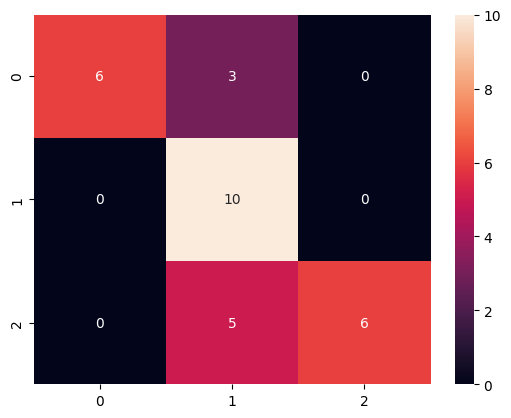

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<Axes: >

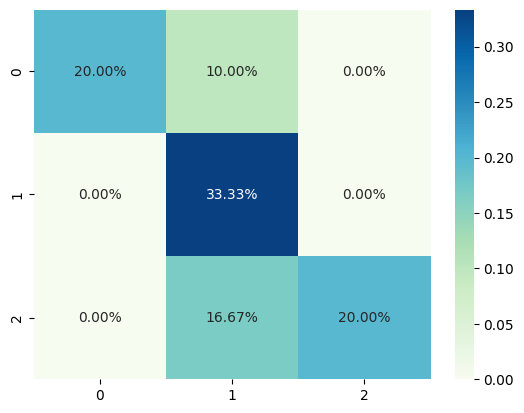

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='GnBu')